In [152]:
import requests, json, time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import numpy as np

%matplotlib inline

In [196]:
data=[]
stations=json.load(open('D:/bike data/stations.json'))
stationsDF=pd.DataFrame.from_dict(stations['data']['stations'])
stationsDF.head()

for i in range(0,145):
    d=json.load(open('D:/bike data/stationdata'+str(i)+'.json'))
    clean=pd.DataFrame.from_dict(d['data']['stations'])
    clean['time']=time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(d['last_updated']))
    clean['lat']=stationsDF['lat']
    clean['lon']=stationsDF['lon']

    data.append(clean)
    df=pd.concat(data)


In [189]:
data2=[]
for i in range(0,145):
    d2=json.load(open('D:/bike data/bikedata'+str(i)+'.json'))
    clean2=pd.DataFrame.from_dict(d2['data']['bikes'])
    clean2['time']=time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(d2['last_updated']))
    data2.append(clean2)
    df2=pd.concat(data2)


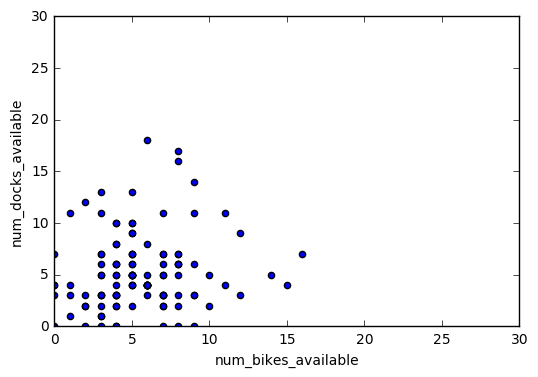

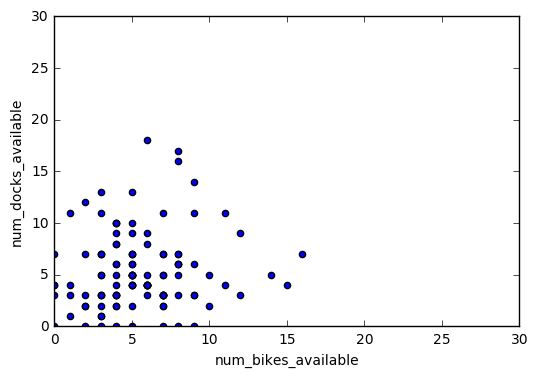

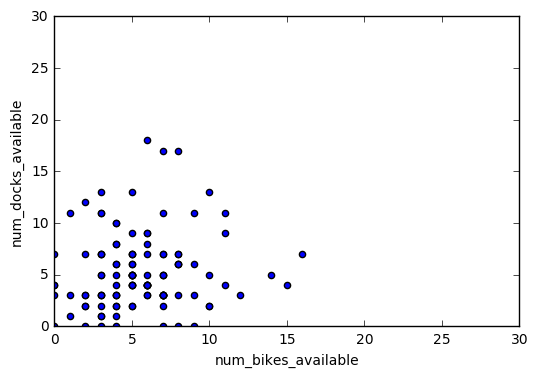

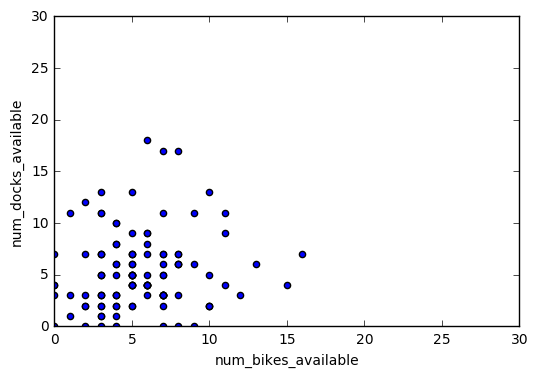

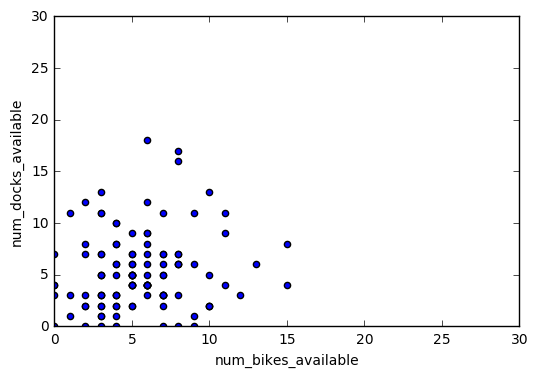

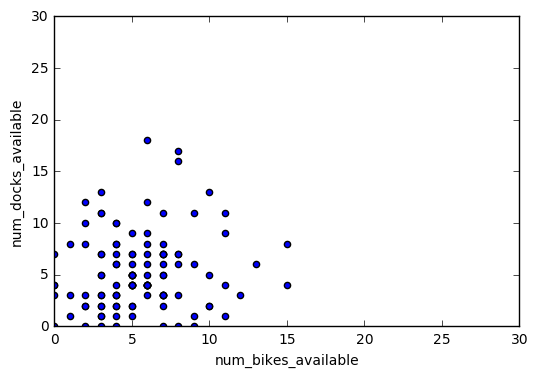

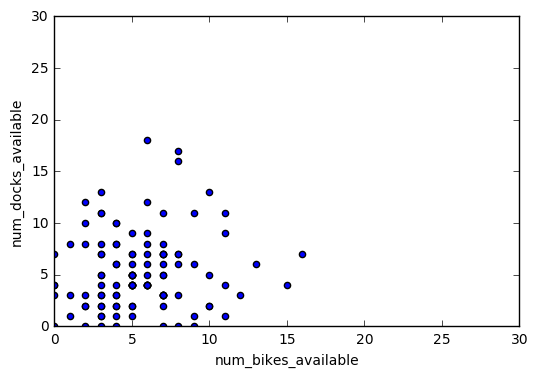

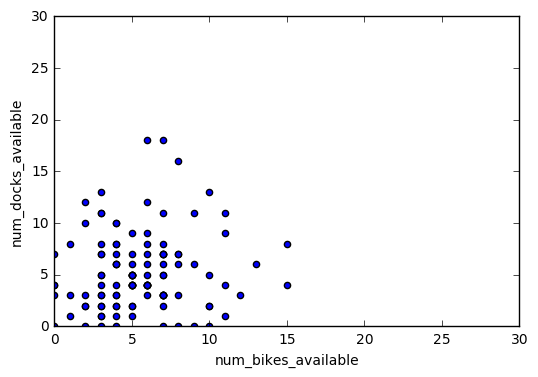

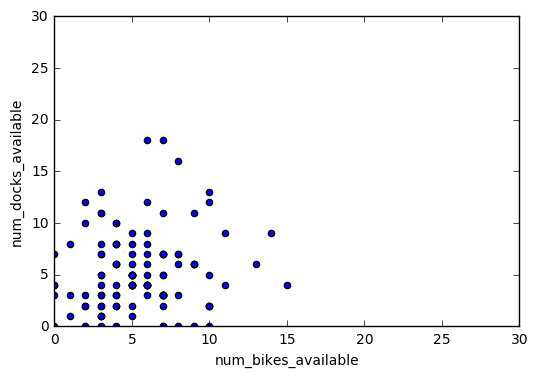

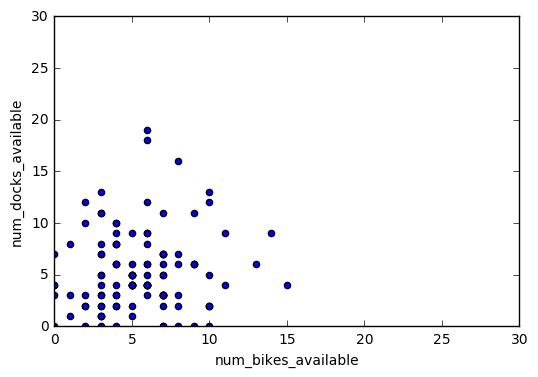

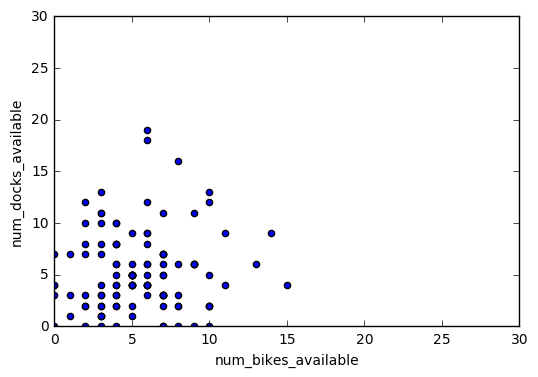

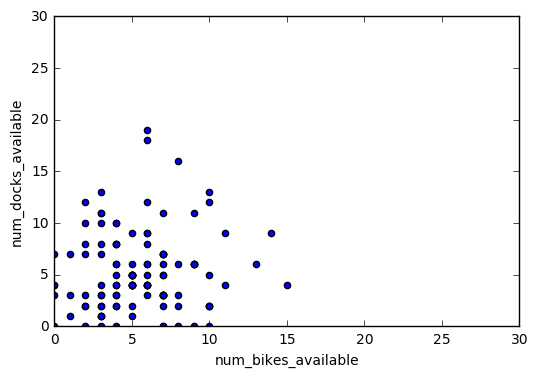

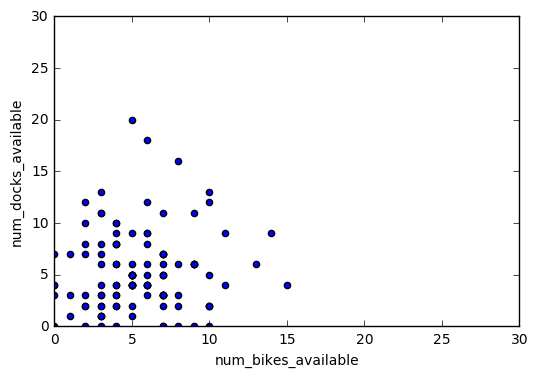

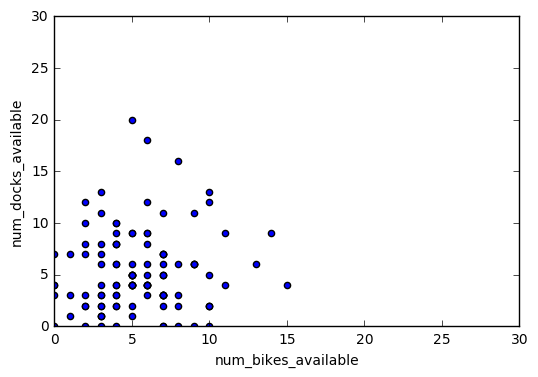

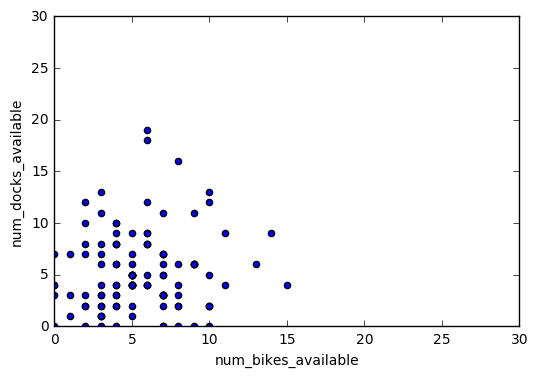

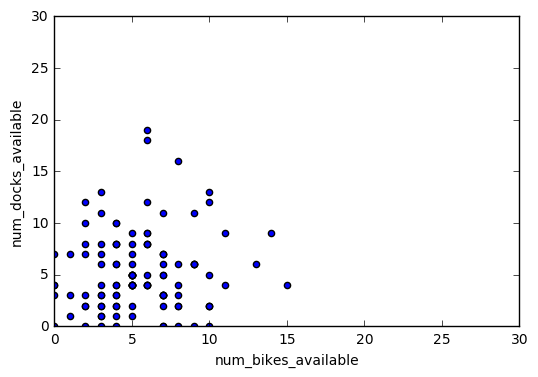

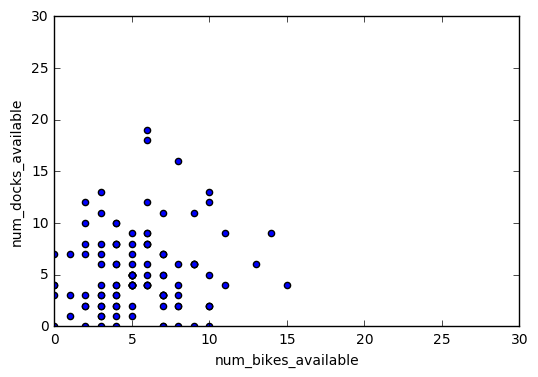

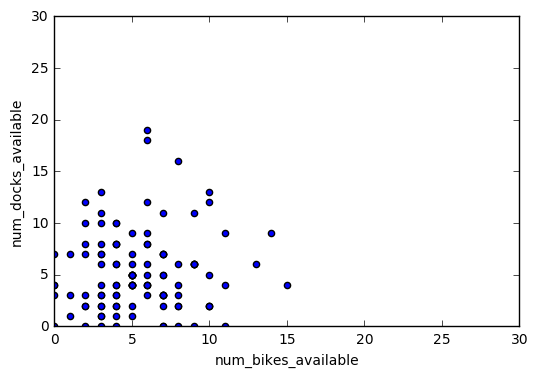

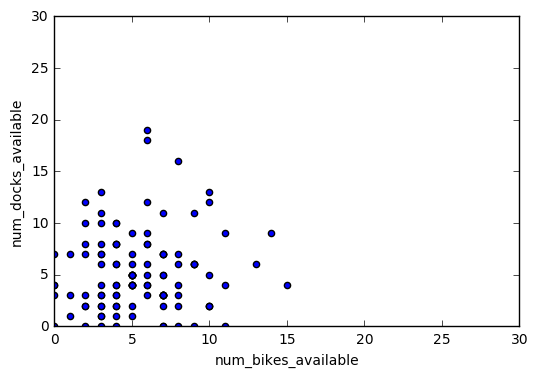

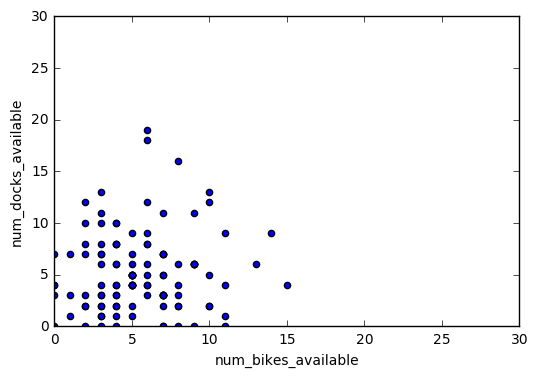

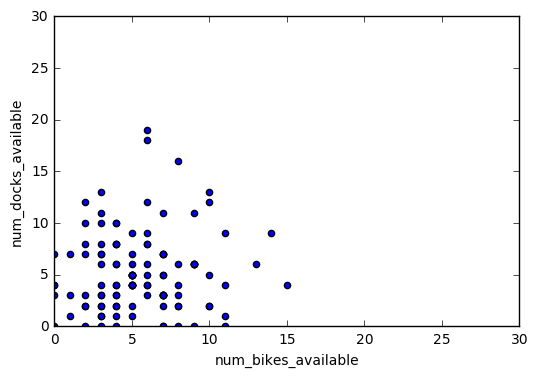

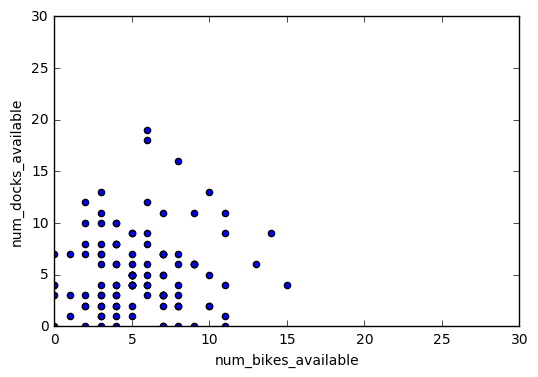

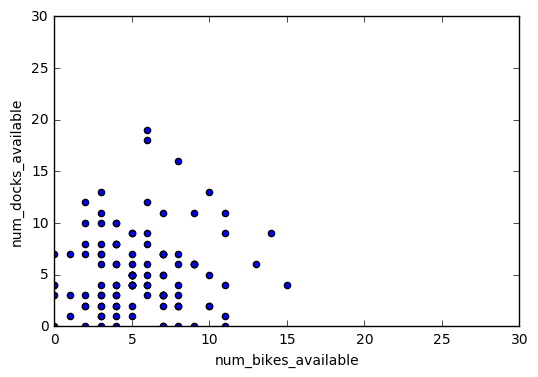

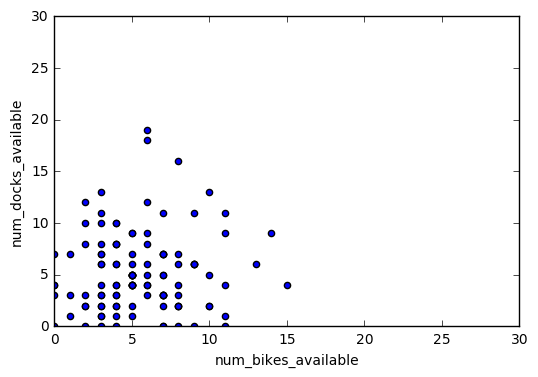

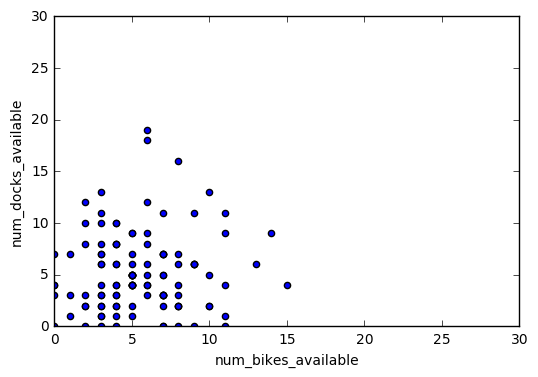

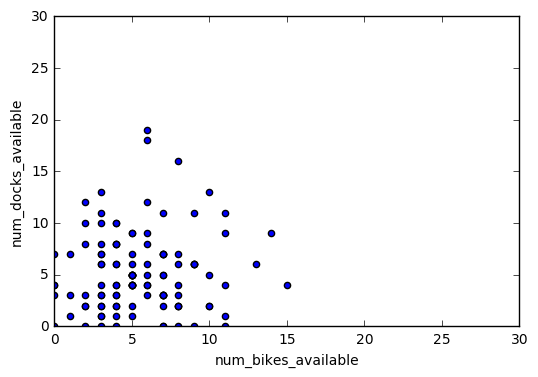

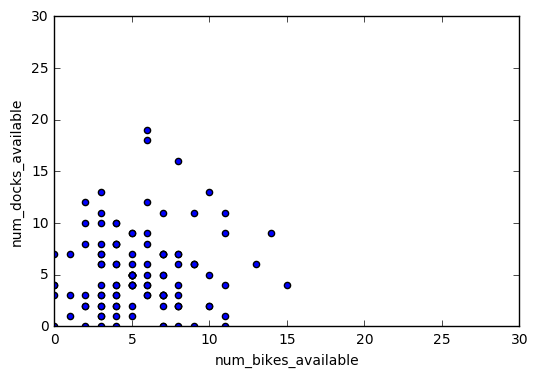

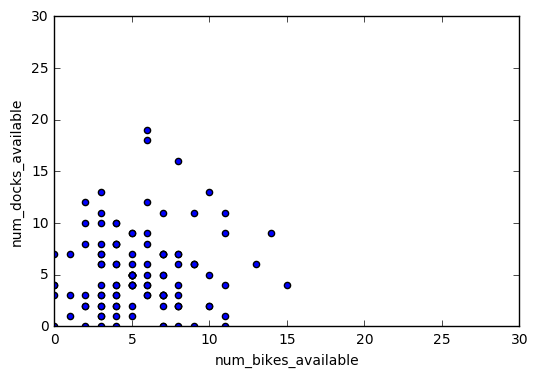

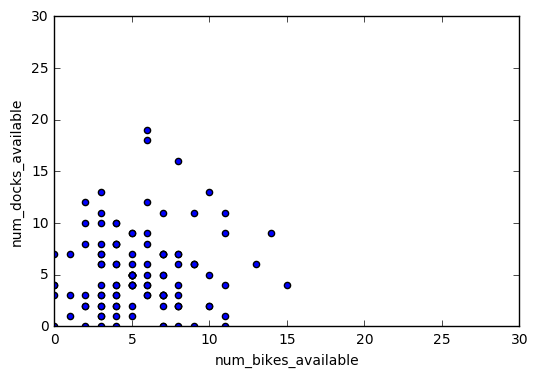

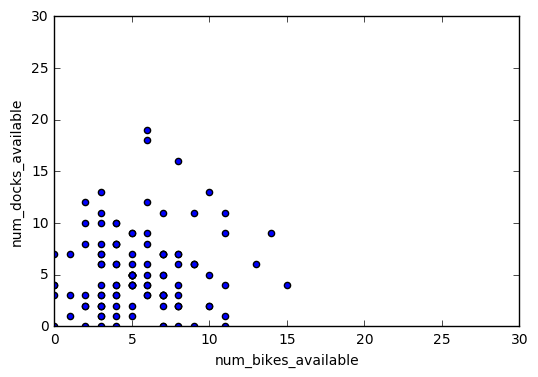

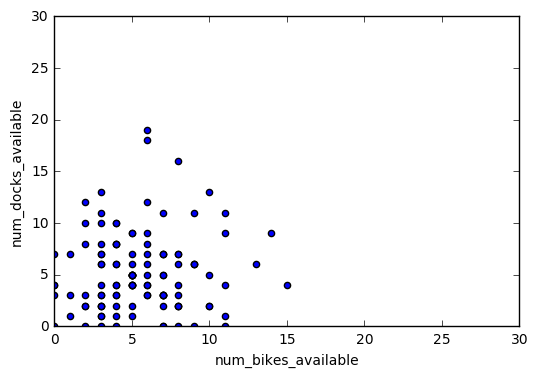

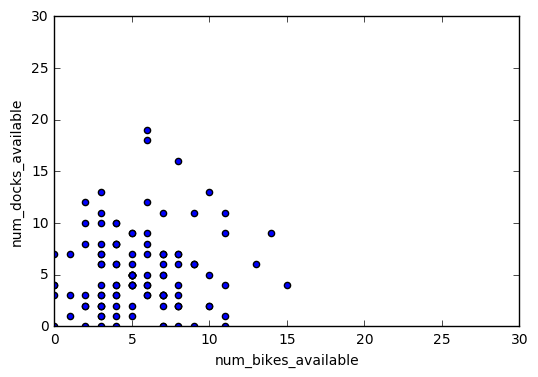

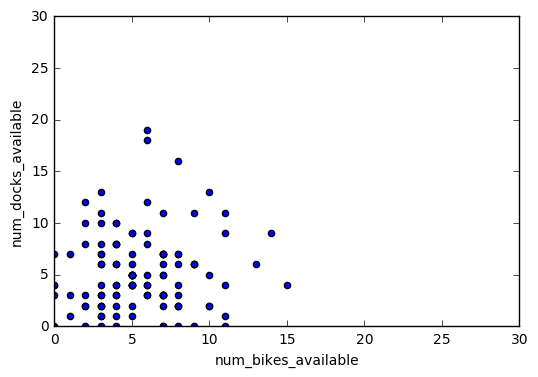

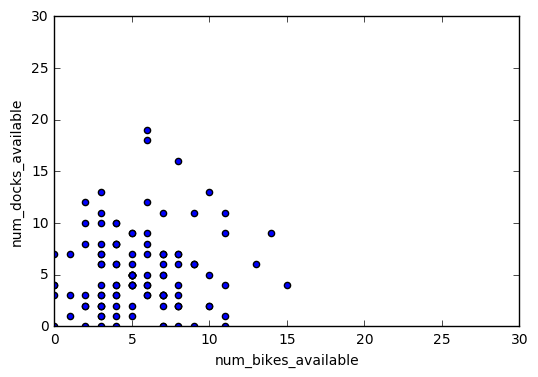

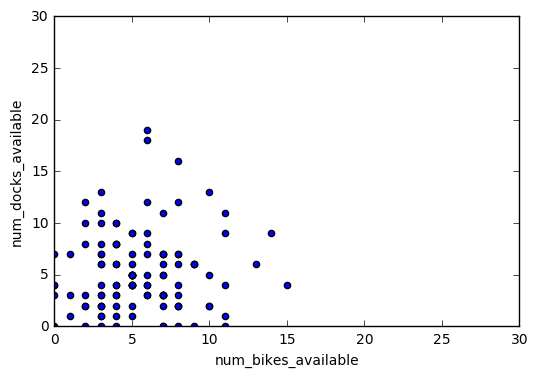

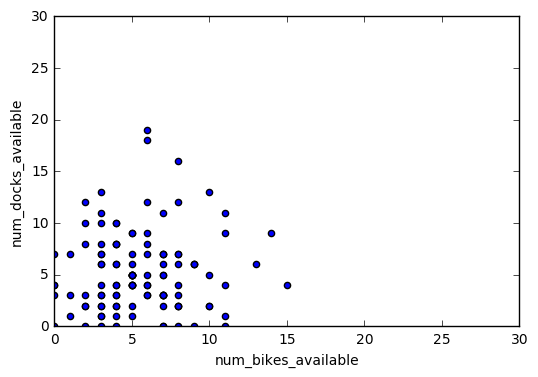

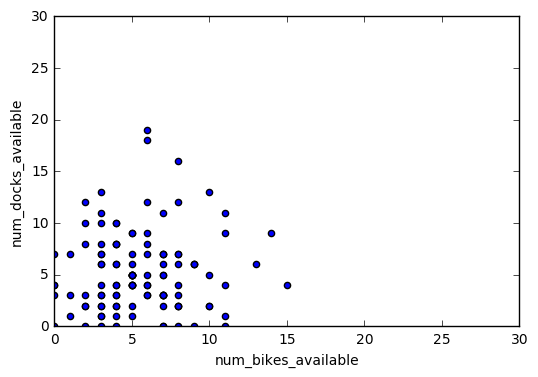

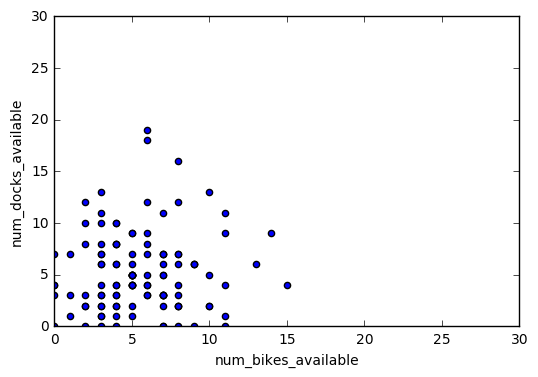

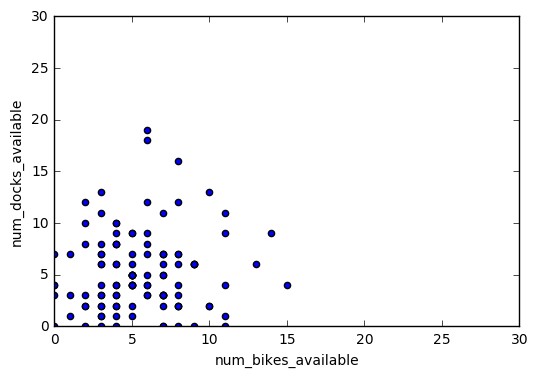

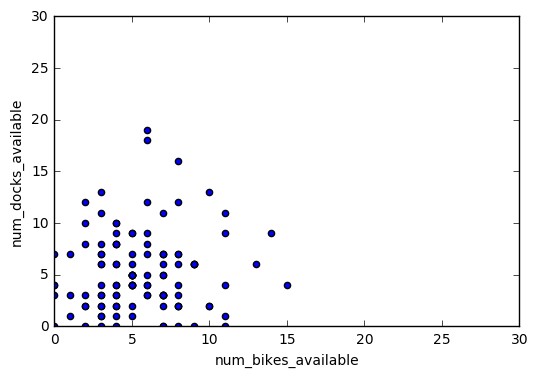

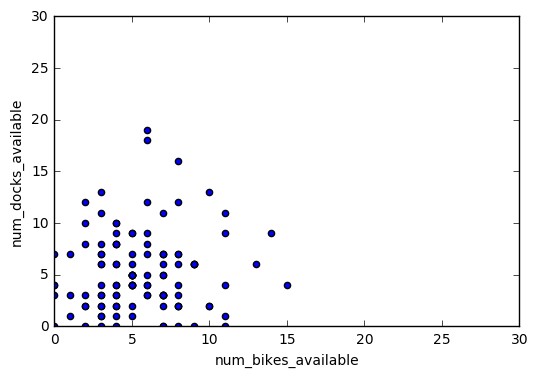

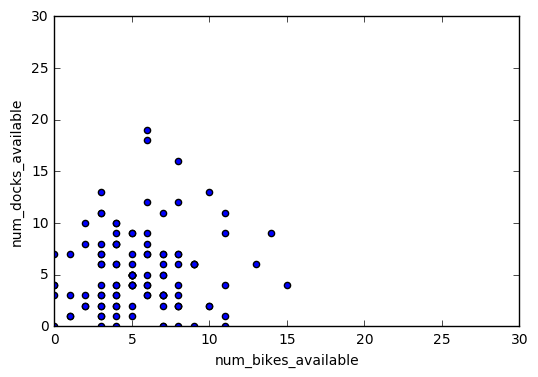

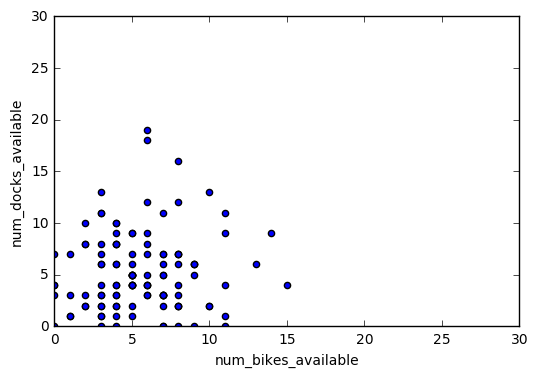

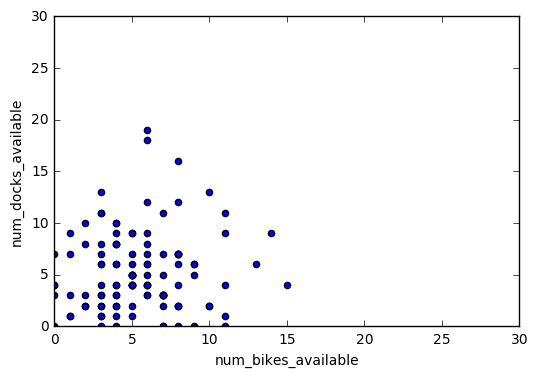

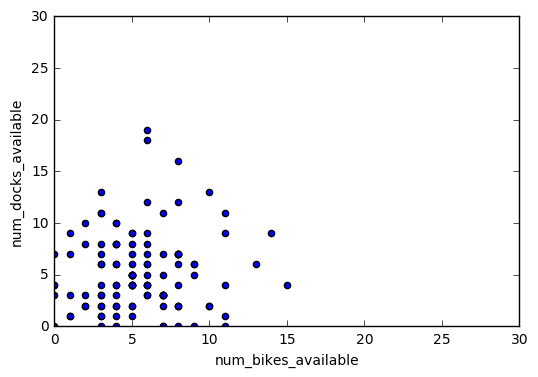

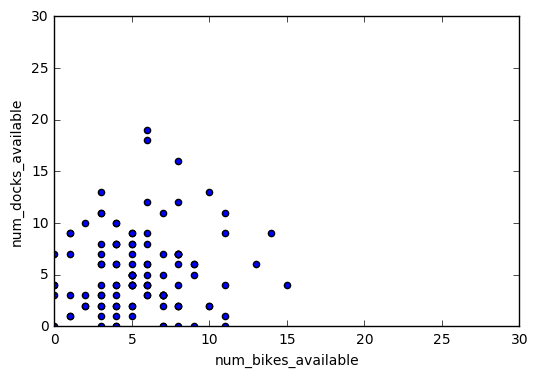

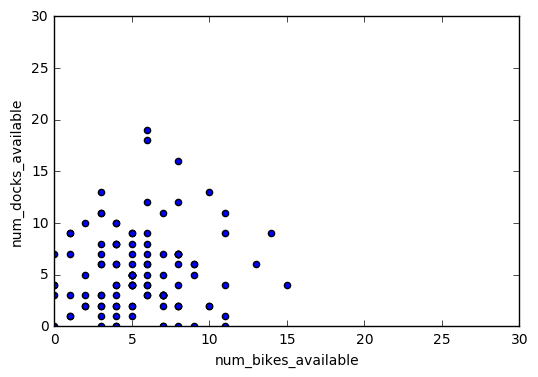

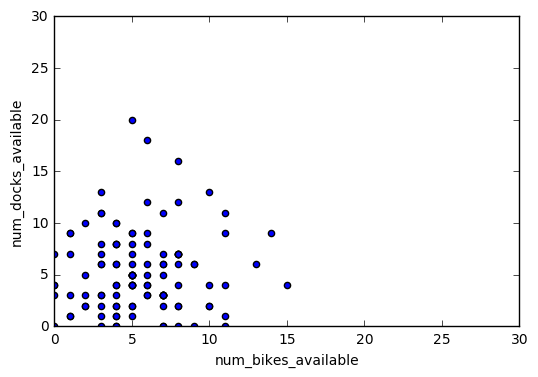

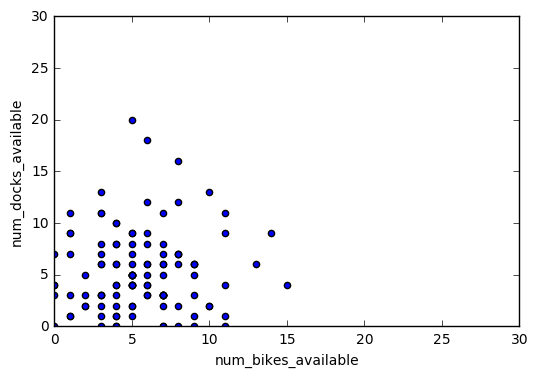

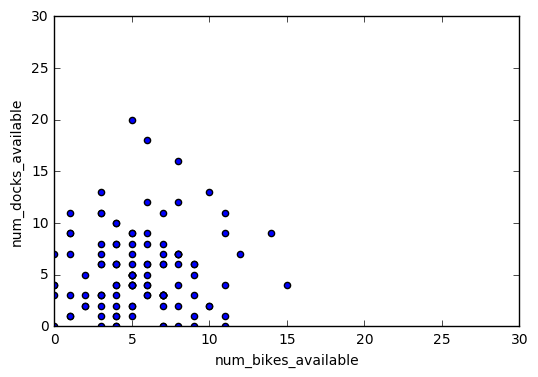

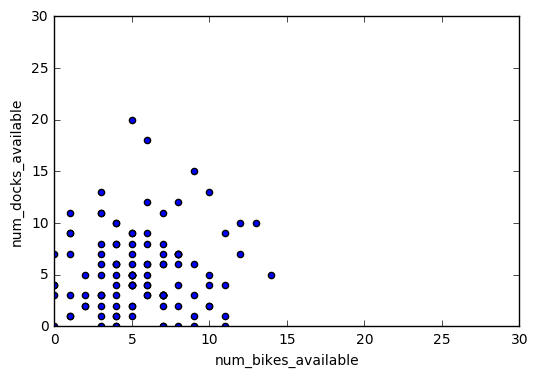

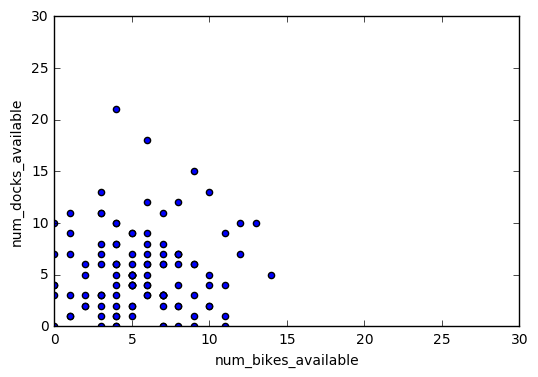

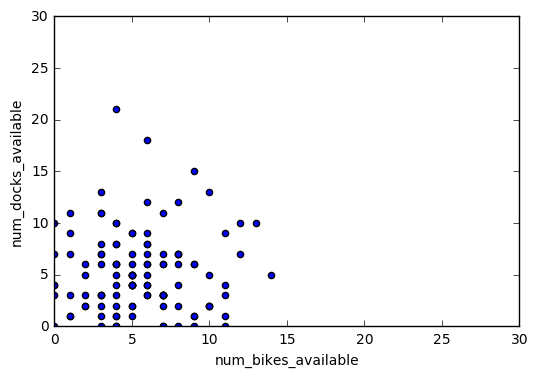

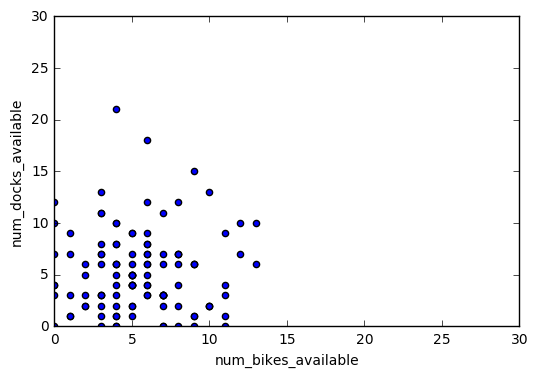

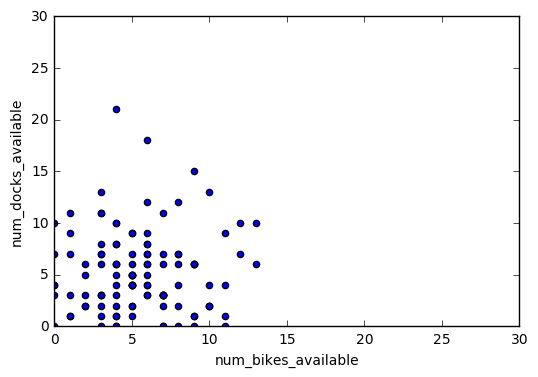

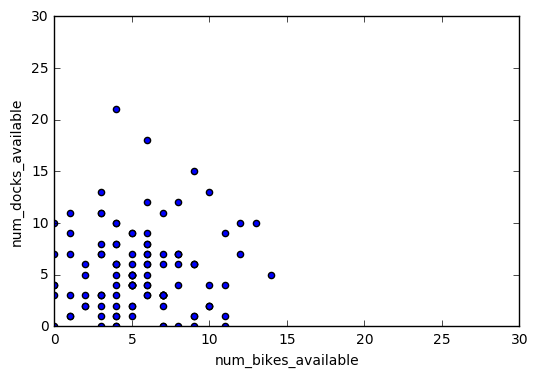

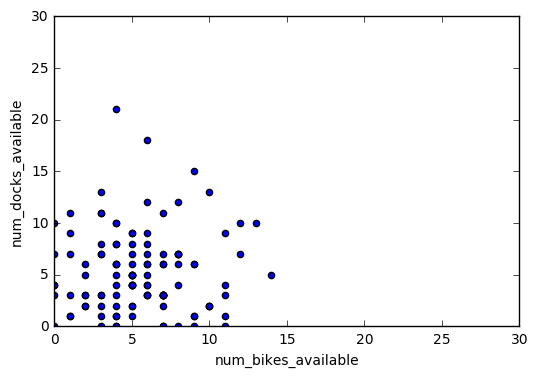

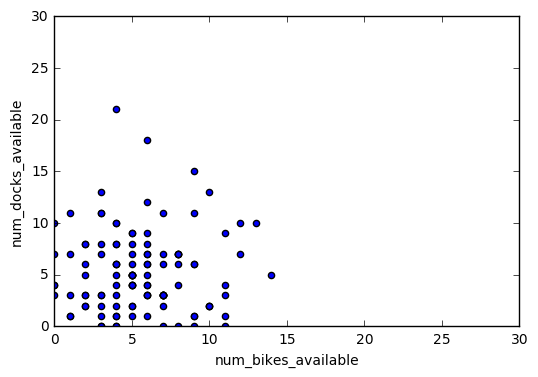

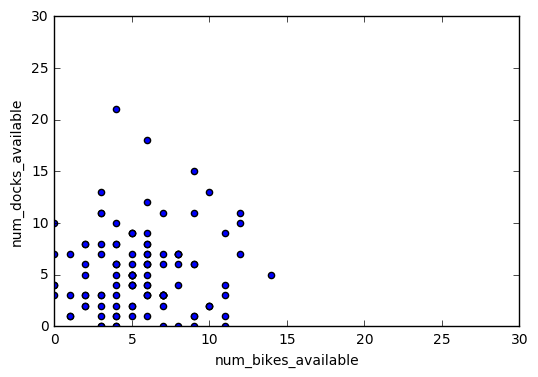

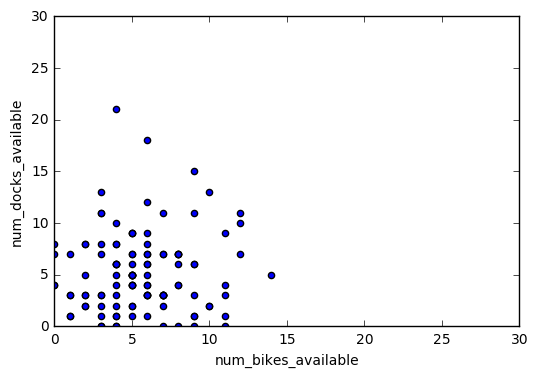

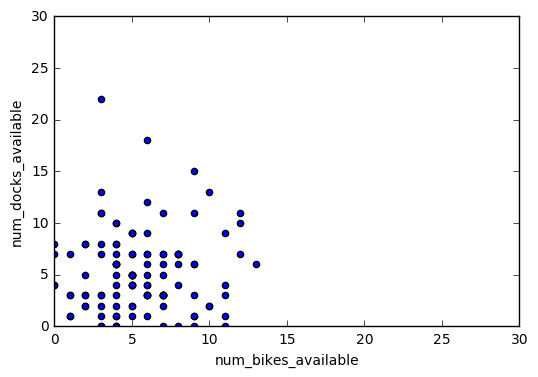

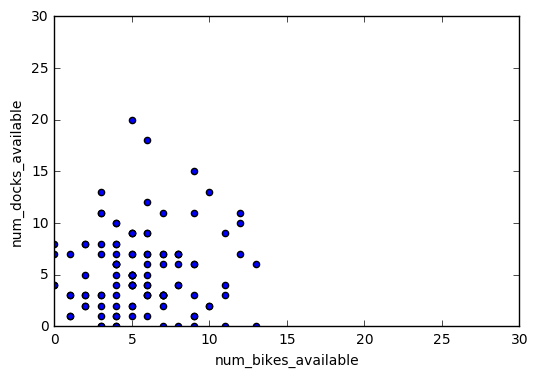

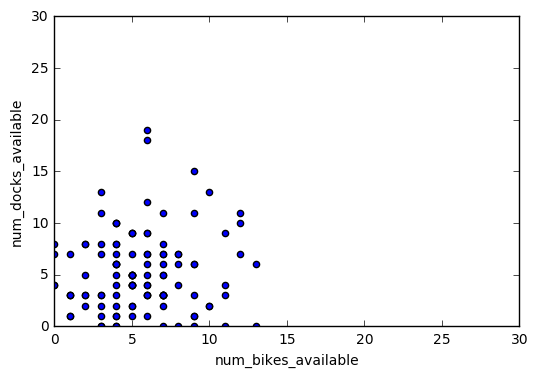

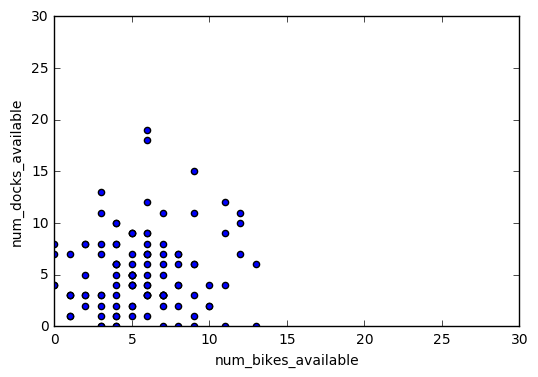

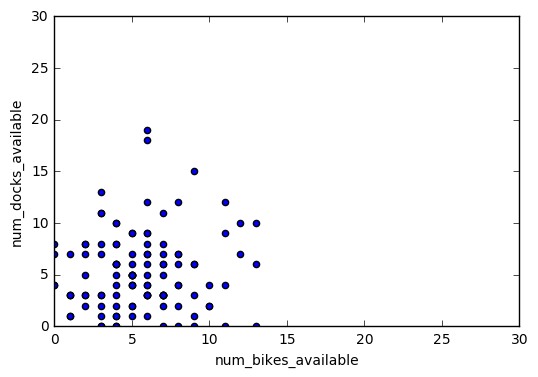

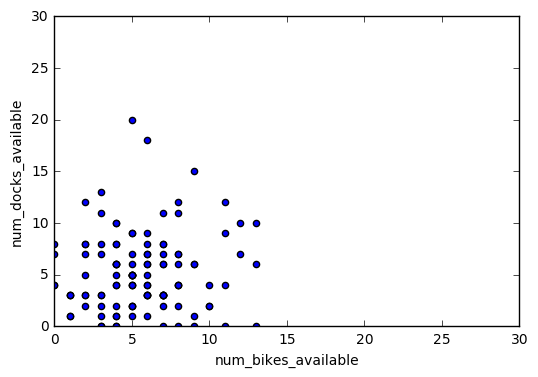

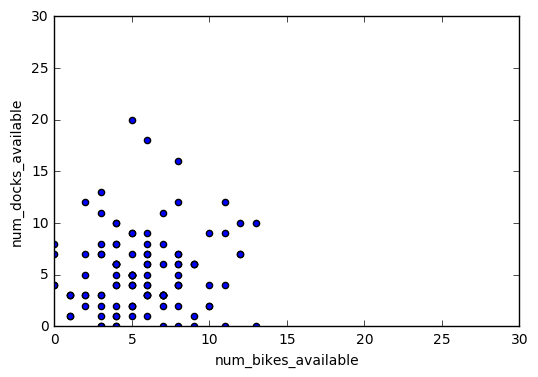

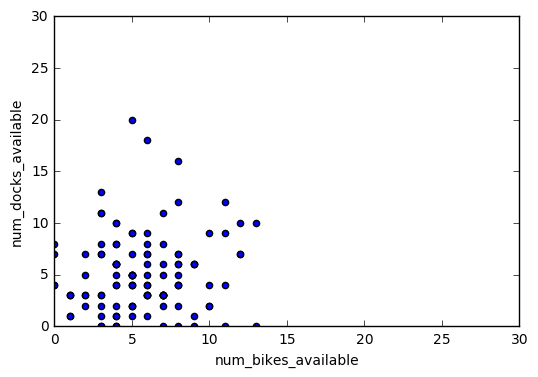

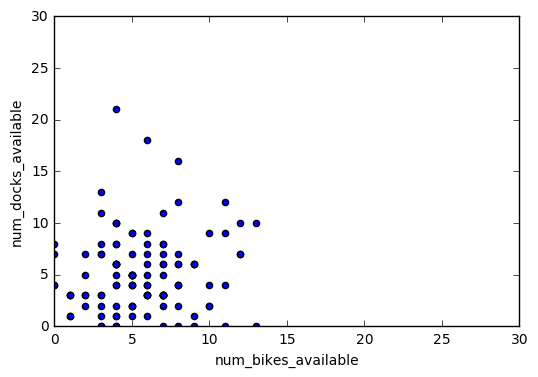

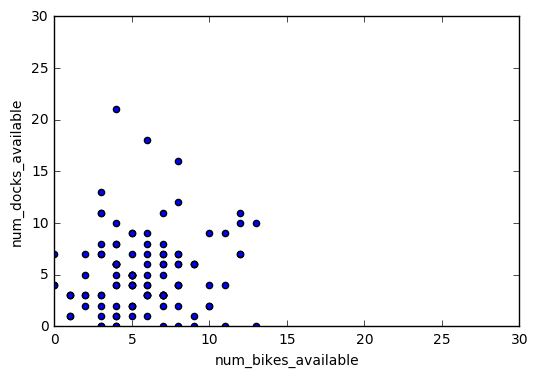

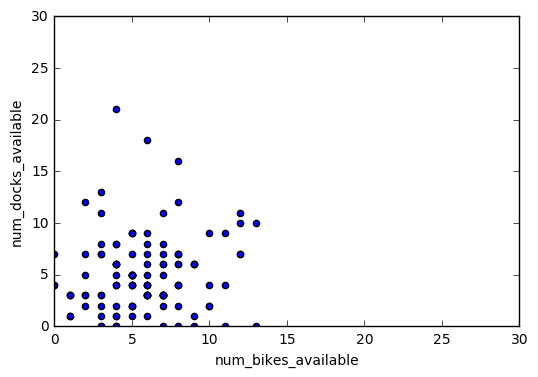

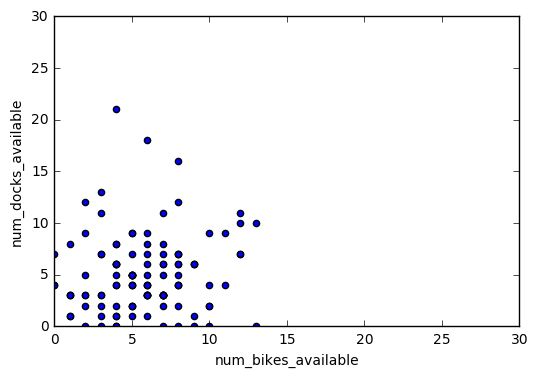

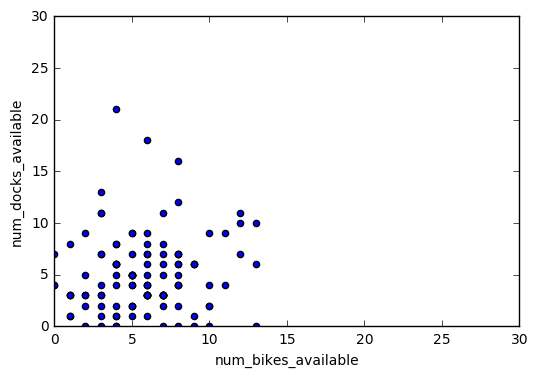

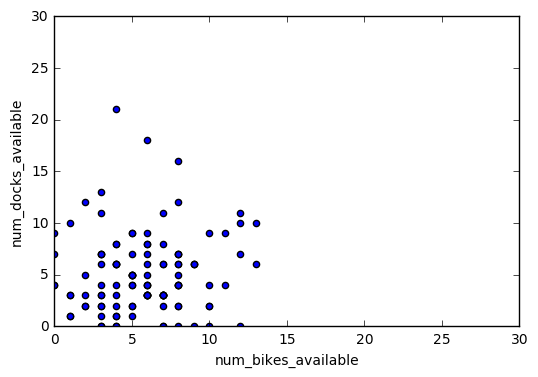

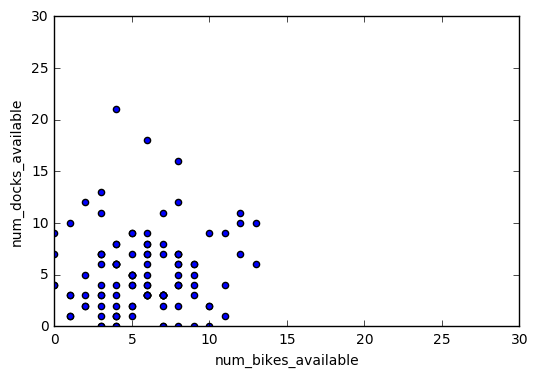

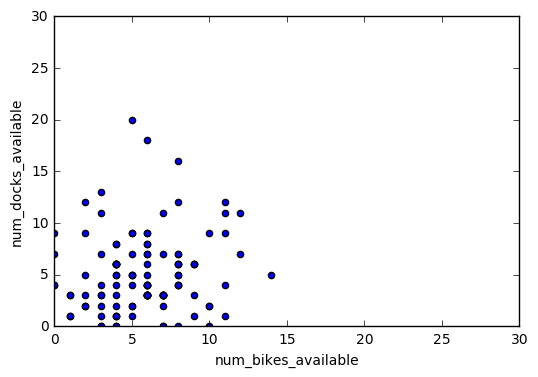

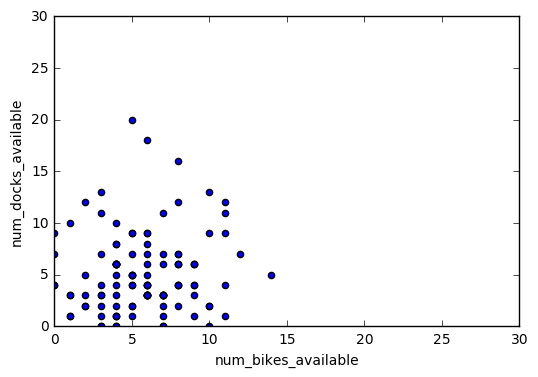

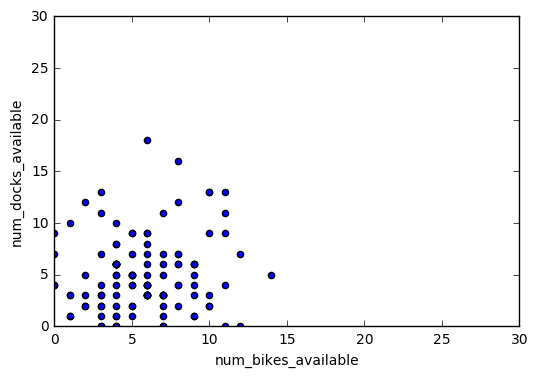

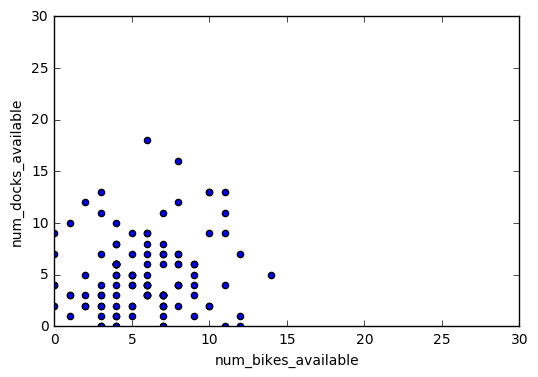

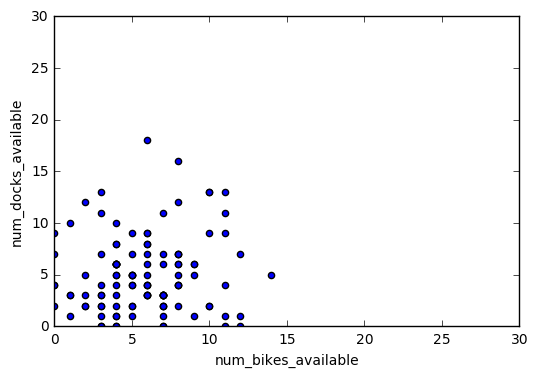

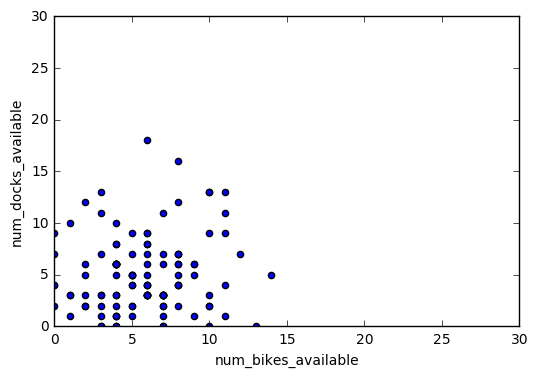

In [190]:
for i in range(0,81):
    data=[]
    d=json.load(open('D:/bike data/stationdata'+str(i)+'.json'))
    clean=pd.DataFrame.from_dict(d['data']['stations'])
    clean['time']=time.strftime('%m/%d/%Y %H:%M:%S',  time.localtime(d['last_updated']))
    data.append(clean)
    df=pd.concat(data)
    df.plot.scatter('num_bikes_available', 'num_docks_available')
    plt.xlim(0,30)
    plt.ylim(0,30)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.5)

In [218]:
df1 = df.set_index(pd.DatetimeIndex(df['time']))
df1['count']=1
df1.head()
new=df1.resample('20min').sum()
new.head()

df3 = df2.set_index(pd.DatetimeIndex(df2['time']))
df3['count']=1
df3.head()
new2=df3.resample('20min').sum()

True


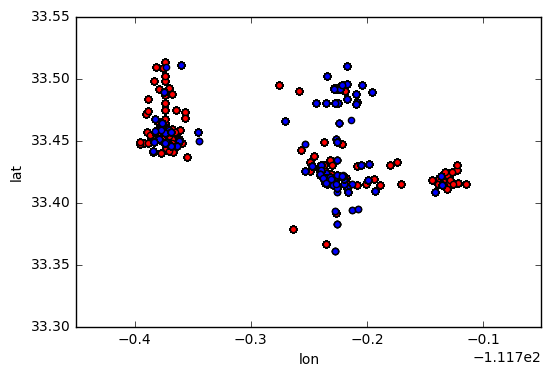

In [215]:
ax1=df1.plot(kind='scatter',x='lon',y='lat',c='r')
ax2=df3.plot(kind='scatter',x='lon', y='lat',ax=ax1)
print(ax1 == ax2)

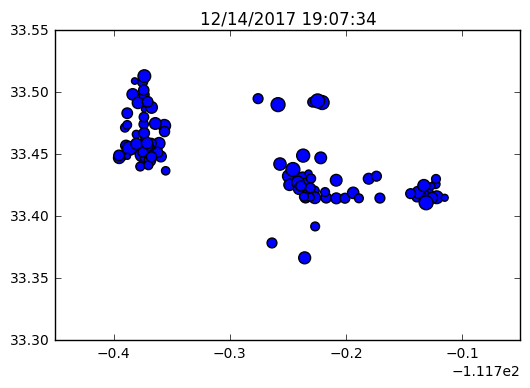

In [200]:
for i in range(81):
    plt.clf()
    plt.scatter(df.loc[df['time'] == df.time.unique()[i]]['lon'],df.loc[df['time'] == df.time.unique()[i]]['lat'], 
                s=100*(df.loc[df['time'] == df.time.unique()[i]]['num_bikes_available'])/(df.loc[df['time'] == df.time.unique()[i]]['num_bikes_available']+df.loc[df['time'] == df.time.unique()[i]]['num_docks_available']))
    plt.title(df.time.unique()[i])
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.15)

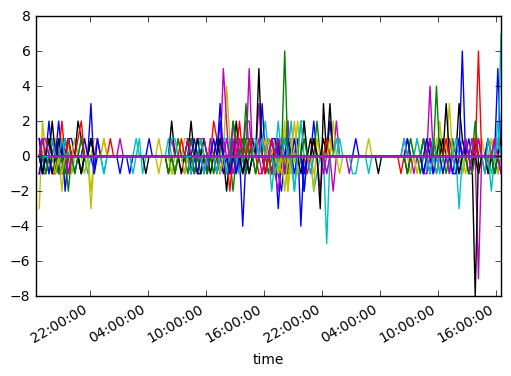

In [229]:
for i in range(117):
    df1.loc[df1['station_id'] == df1.station_id.unique()[i]]['num_bikes_available'].diff().plot()

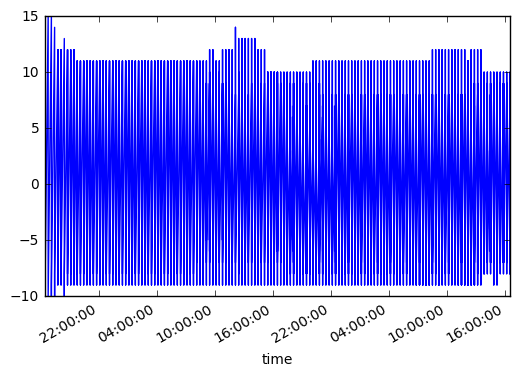

In [219]:
df1['num_bikes_available'].diff().plot()

In [227]:
df1.loc[df1['station_id'] == df1.station_id.unique()[0]]['num_bikes_available'].diff()

time
2017-12-13 16:24:56    NaN
2017-12-13 16:44:58    0.0
2017-12-13 17:04:59    0.0
2017-12-13 17:25:01    0.0
2017-12-13 17:45:03   -1.0
2017-12-13 18:05:05    0.0
2017-12-13 18:25:08    1.0
2017-12-13 18:45:09   -1.0
2017-12-13 19:05:11   -1.0
2017-12-13 19:25:13    0.0
2017-12-13 19:45:15    0.0
2017-12-13 20:05:17    0.0
2017-12-13 20:25:20    0.0
2017-12-13 20:45:22    0.0
2017-12-13 21:05:24    0.0
2017-12-13 21:25:26    0.0
2017-12-13 21:45:28    0.0
2017-12-13 22:05:30    0.0
2017-12-13 22:25:32    0.0
2017-12-13 22:45:34    0.0
2017-12-13 23:05:36    0.0
2017-12-13 23:25:41    0.0
2017-12-13 23:45:43    0.0
2017-12-14 00:05:44    0.0
2017-12-14 00:25:46    0.0
2017-12-14 00:45:48    0.0
2017-12-14 01:05:50    0.0
2017-12-14 01:25:52    0.0
2017-12-14 01:45:53    0.0
2017-12-14 02:05:55    0.0
                      ... 
2017-12-15 06:48:43    0.0
2017-12-15 07:08:45    0.0
2017-12-15 07:28:47    0.0
2017-12-15 07:48:49    0.0
2017-12-15 08:08:51    0.0
2017-12-15 08:28:53    

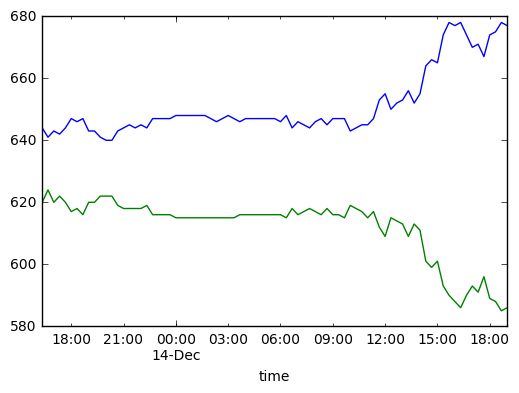

In [91]:
new['num_bikes_available'].plot()
new['num_docks_available'].plot()


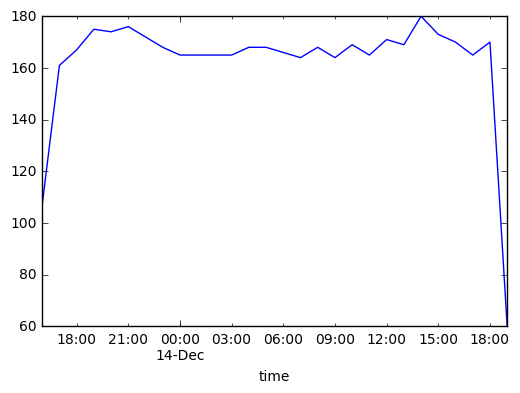

In [89]:
new2['count'].plot()